In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

Задание 1 (Алгоритм разрастания регионов)

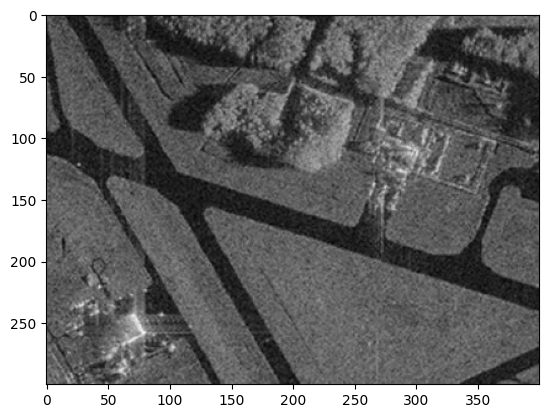

In [3]:
image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
plt.imshow(image_gray, cmap="gray")

In [4]:
import math
def homo_average(img, mask, point, T):
    av_val = img[mask > 0].sum() / np.count_nonzero(img[mask > 0])
                                                            
    if abs(av_val - img[point]) <= T:
        return True
    
    return False

In [5]:
def region_growing(image, seed_point,homo_fun,r, T):
    mask = np.zeros(image_gray.shape, np.uint8)
    mask[seed_point] = 1
    count = 1
    while count > 0:
        count = 0
        local_mask = np.zeros(image_gray.shape, np.uint8)
        for i in range(r,image.shape[0] - r):
            for j in range(r,image.shape[1] - r):
                if mask[i,j]==0 and mask[i - r:i + r, j-r: j+r].sum() > 0:
                    if homo_fun(image, mask, (i,j), T):
                        local_mask[i,j] = 1
        count = np.count_nonzero(local_mask)
        print(count)
        mask += local_mask
        
    return mask*255

90
295
481
699
867
939
1139
1159
1014
973
949
840
1139
717
653
616
548
505
441
380
293
285
244
135
5
0


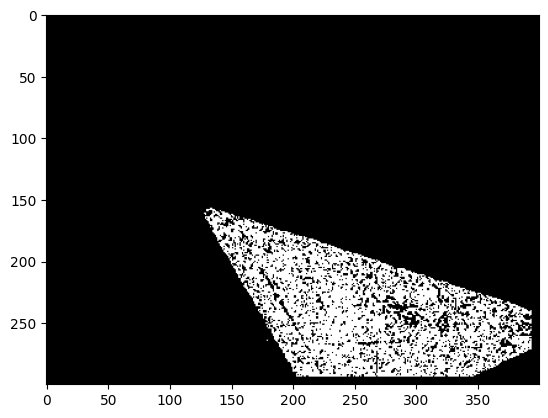

In [6]:
seed_point = (250, 250)
mask = region_growing(image_gray, seed_point, homo_average, 6, 10)
plt.imshow(mask, cmap="gray")

Алгоритм сегментации watershed+distance transform для задачи подсчета пальмовых деревьев

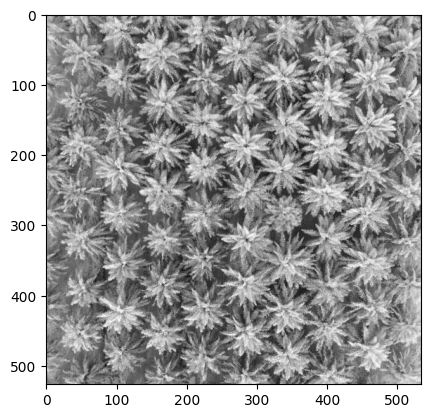

In [7]:
image = cv2.imread("palm_1.JPG")
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap = "gray")

In [8]:
ret, thresh = cv2.threshold(image_gray,0,255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

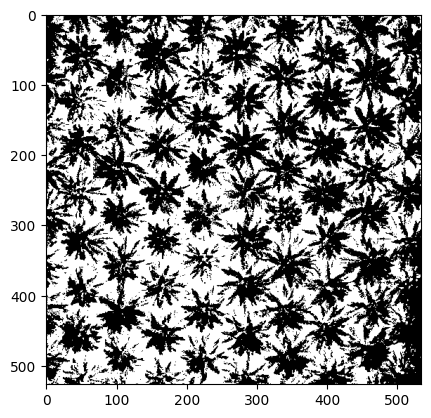

In [9]:
plt.imshow(thresh, cmap="gray")

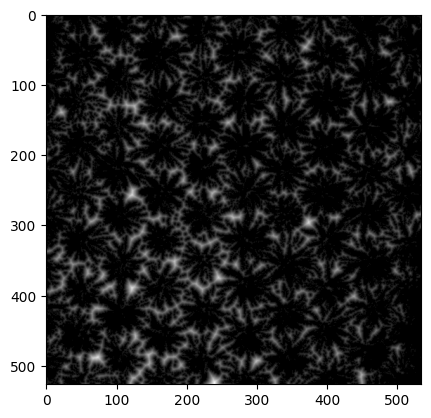

In [10]:
dist = cv2.distanceTransform(thresh, cv2.DIST_L2, 5) 
plt.imshow(dist, cmap="gray")

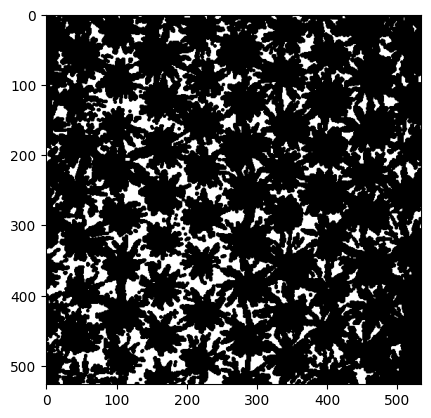

In [11]:
ret, sure_fg = cv2.threshold(dist, 0.2 * dist.max(), 255, cv2.THRESH_BINARY) 
plt.imshow(sure_fg, cmap="gray")

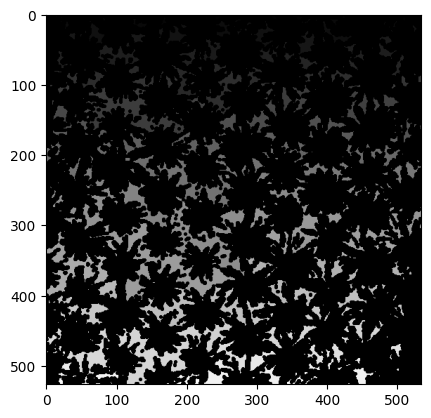

In [12]:
sure_fg = sure_fg.astype(np.uint8)
ret, markers = cv2.connectedComponents(sure_fg) 
plt.imshow(markers, cmap="gray")

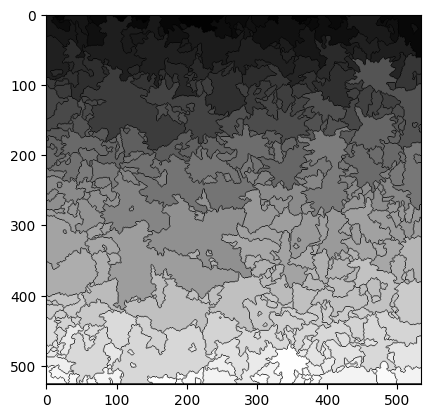

In [13]:
markers = cv2.watershed(image, markers)
plt.imshow(markers, cmap="gray")

Реализация другого алгоритма к-средних

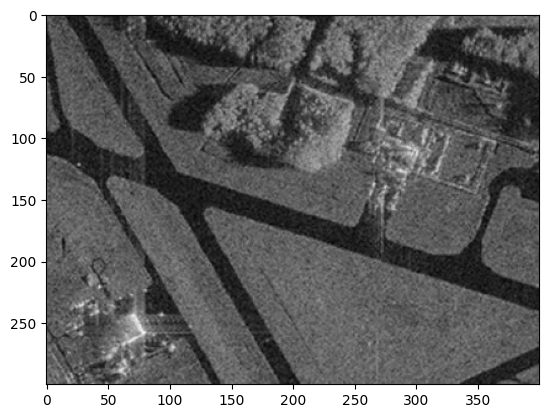

In [14]:
image = cv2.imread("sar_1.jpg")
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap="gray")

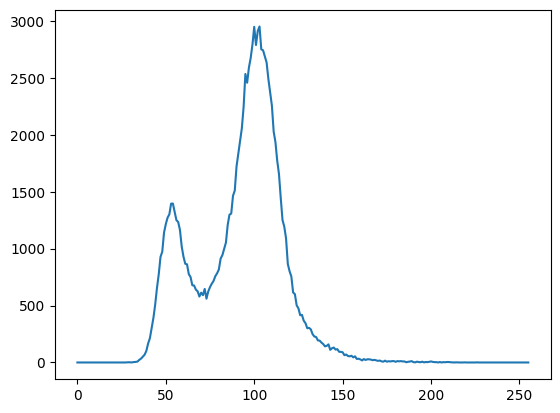

In [15]:
def make_hist(image):
    histSize = 256
    histRange = (0, 256)
    accumulate = False
    return cv2.calcHist([image], [0], None, [histSize], histRange, accumulate=accumulate)

hist = make_hist(image_gray)
plt.plot(hist)

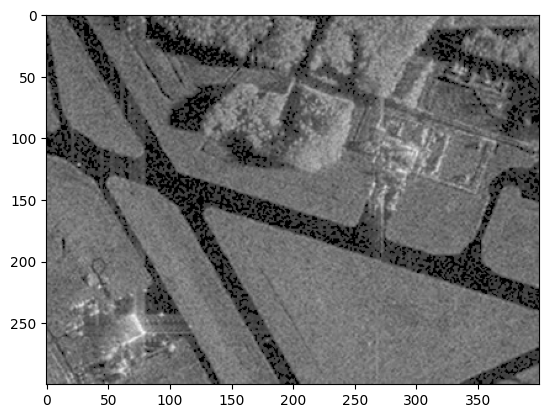

In [23]:
_,thresh = cv2.threshold(image_gray, 50, 50, cv2.THRESH_TOZERO)
plt.imshow(thresh, cmap="gray")

In [18]:
z = image_gray.reshape((-1,3))
# convert to np.float32
z = np.float32(z)
#best_labels = ((50,250),(300,100))
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.5)
K = 3
ret,label,center=cv2.kmeans(z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((image_gray.shape))

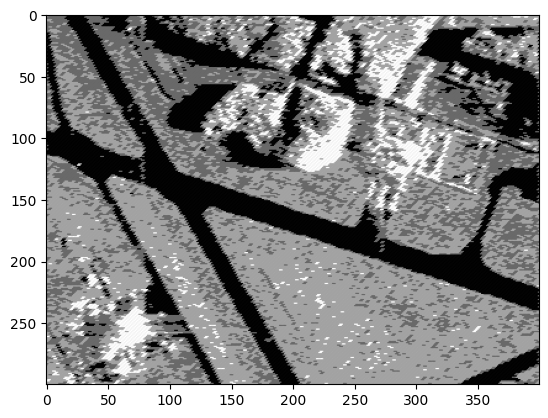

In [ ]:
plt.imshow(res2, cmap="gray")